# Lab5 - Batch sampling

In practice retraining or fine tuning of active learning model can be time(or other resource) expensive and become a bottleneck of the system.

To handle such cases of downtime we can always use random sampling to choose labelled objects while model is retrained. However, in many cases this can lead to no AL performance gain, therefore we consider so called batch sampling, i.e., selection of many objects from the pool in one iteration.

During this lab session we will focus on methods that allow to obtain decent model quality gain in batch AL scenario.

0. Lets start with downloading a dataset and spliting it into learning pool and evaluation part. We will use the electricity dataset from openml. \
See https://www.openml.org/d/151

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('electricity', return_X_y=True)
X.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912


(array([19237.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 26075.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

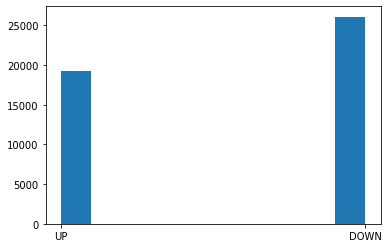

In [4]:
import matplotlib.pyplot as plt
plt.hist(y)

1. One hot encode the day feature.

2. Create an active learning loop, measure the performance using BAC.
Train a model with batch 20 and a chosen informativeness measure. Start from 1% of pool data, sample 2% of the pool size.
Compare your results with random sampling.

3. Add to informativeness a random normal distribution with 0 mean and std 0.5 to obtain a batch with better diversity.

Perform the experiments.

4.* Add a distance based diversity. I.e.: 
  
  a) Initialize the informativeness score with chosen informativeness measure, start with empty batch. \
  b) Choose one most informative sample at once, add it to the batch.  \
  c) Add to informativeness score of every sample a normalized distance to objects in the chosen batch. \
  d) Repeat b) c) until expected batch size is reached.

5.* Add a  simple representativenes to the informativeness, i.e. average distance to every other sample in the pool.